# Neural Networks for Handwritten Digit Recognition, Binary

In this notebook, I will use a neural network to recognize the hand-written digits zero and one.


# Outline
- [ 1 - Packages ](#1)
- [ 2 - Neural Networks](#2)
  - [ 2.1 Problem Statement](#2.1)
  - [ 2.2 Dataset](#2.2)
  - [ 2.3 Model representation](#2.3)
  - [ 2.4 Tensorflow Model Implementation](#2.4)
  - [ 2.5 NumPy Model Implementation (Forward Prop in NumPy)](#2.5)
  - [ 2.6 Vectorized NumPy Model Implementation (Optional)](#2.6)

<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that we need.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

**Tensorflow and Keras**  
Tensorflow is a machine learning package developed by Google. In 2019, Google integrated Keras into Tensorflow and released Tensorflow 2.0. Keras is a framework developed independently by François Chollet that creates a simple, layer-centric interface to Tensorflow. In this workflow, I will be using the Keras interface. 

<a name="2"></a>
## 2 - Neural Networks

Neural networks are primarily used for tasks which are quite complex to deal with regression algorithms. They are mainly used for image recognition tasks. Here, we will be using it in a similar way for recognizing the handwritten digits 0 and 1. 

<a name="2.1"></a>
### 2.1 Problem Statement

In this exercise, we will use a neural network to recognize two handwritten digits, zero and one. This is a binary classification task. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. We can extend this network to recognize all 10 digits (0-9) as well.

<a name="2.2"></a>
### 2.2 Dataset

You will start by loading the dataset for this task. 
- The `load_data()` function shown below loads the data into variables `X` and `y`


- The data set contains 1000 training examples of handwritten digits $^1$, here limited to zero and one.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. 
        - Each training example becomes a single row in our data matrix `X`. 
        - This gives us a 1000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

- The second part of the training set is a 1000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 1` if the image is of the digit `1`.

$^1$<sub> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)</sub>

In [3]:
#load the dataset

X, y = load_data()

<a name="toc_89367_2.2.1"></a>
#### 2.2.1 View the variables
Let's get more familiar with the dataset.  
- A good place to start is to print out each variable and see what it contains.

The code below prints elements of the variables `X` and `y`.  

In [4]:
print ('The first element of X is: ', X[0])
#As we can see, X is a 1000 x 400 dimensional vector.The first row contains the values of the pixel intensities of the 
#first image

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [5]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  1


<a name="toc_89367_2.2.2"></a>
#### 2.2.2 Check the dimensions of your variables

Another way to get familiar with the data is to view its dimensions. We print the shape of X and y and the number of training examples in the dataset.

In [7]:
print('The shape of X is: ' + str(X.shape))
print('The shape of y is: ' + str(y.shape))
print('The number of training examples are: ' + str(len(X)))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)
The number of training examples are: 1000


<a name="toc_89367_2.2.3"></a>
#### 2.2.3 Visualizing the Data

Here, we will begin by visualizing a subset of the training set. 
- In the cell below, the code randomly selects 64 rows from `X`, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together. 
- The label for each image is displayed above the image 

In [8]:
import warnings 
warnings.simplefilter(action = 'ignore', category = FutureWarning)

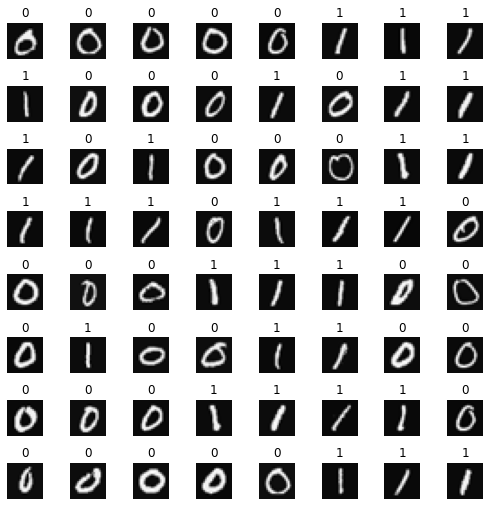

In [9]:
m,n = X.shape

fig, axes = plt.subplots(8,8,figsize = (7,7))
fig.tight_layout(pad = 0.1)

for i, ax in enumerate(axes.flat):
    #Select the random indices from 0 to m-1
    random_index = np.random.randint(m)
    
    #Select the rows corresponding to the random indices and reshape the image
    X_random = X[random_index].reshape((20,20)).T
    
    #Display the image
    ax.imshow(X_random, cmap = 'gray')
    
    #Display the label above the image
    ax.set_title(y[random_index, 0])
    ax.set_axis_off()

<a name="2.3"></a>
### 2.3 Model representation

The neural network that we will use is shown in the figure below. 
- This has three dense layers with sigmoid activations.
    - Recall that the inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs  
    
<img src="images/C2_W1_Assign1.PNG" width="500" height="400">

- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $1$ output unit in layer 3. 

    - Recall that the dimensions of these parameters are determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then 
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W`, and `b`,  are 
        - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 1) and the shape of `b3` is: (1,)
               

<a name="2.4"></a>
### 2.4 Tensorflow Model Implementation


Here, we construct the neural network with its different layers. 

In [11]:
model = Sequential(
    [
        tf.keras.Input(shape = (400,)), 
        Dense(units = 25, activation = 'sigmoid', name = 'L1'), 
        Dense(units = 15, activation = 'sigmoid', name = 'L2'), 
        Dense(units = 1, activation = 'sigmoid', name = 'L3')
        
    ], name = 'nn_model'
)

In [12]:
model.summary()

Model: "nn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

In [14]:
L1_num_params = 400 * 25 + 25  # W1 parameters  + b1 parameters
L2_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L3_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  10025 , L2 params =  390 ,  L3 params =  16


Let's further examine the weights to verify that tensorflow produced the same dimensions as we calculated above.

In [15]:
[layer1, layer2, layer3] = model.layers

In [16]:
#Examine the weight shapes
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


`xx.get_weights` returns a NumPy array. One can also access the weights directly in their tensor form. Note the shape of the tensors in the final layer.

In [17]:
print(model.layers[2].weights)

[<tf.Variable 'L3/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[-0.16282511],
       [ 0.09823722],
       [ 0.02361786],
       [-0.580566  ],
       [-0.31739223],
       [-0.24156037],
       [-0.25324407],
       [-0.34707615],
       [ 0.4752826 ],
       [-0.42522565],
       [ 0.10542393],
       [-0.6016262 ],
       [-0.5786512 ],
       [-0.58062875],
       [ 0.13323379]], dtype=float32)>, <tf.Variable 'L3/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


#### 2.4.1. Loss and optimizer

The following code will define a loss function and run gradient descent to fit the weights of the model to the training data.

In [20]:
model.compile(
      loss = tf.keras.losses.BinaryCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X, y,
    epochs = 50
)

Epoch 1/50
32/32 [==============================] - 0s 1ms/step - loss: 0.7735
Epoch 2/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5458
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4056
Epoch 4/50
32/32 [==============================] - 0s 1ms/step - loss: 0.3150
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2511
Epoch 6/50
32/32 [==============================] - 0s 1ms/step - loss: 0.2044
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.1692
Epoch 8/50
32/32 [==============================] - 0s 1ms/step - loss: 0.1427
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.1220
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.1057
Epoch 11/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0926
Epoch 12/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0819
Epoch 13/50
32/32 [==============================

In [21]:
prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")
#This predicts the probability of the input (which is a zero) to be one

prediction = model.predict(X[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

#This gives the probability of the input (which is one) to be one

 predicting a zero: [[0.00305223]]
 predicting a one:  [[0.98647535]]


The output of the model is interpreted as a probability. In the first example above, the input is a zero. The model predicts the probability that the input is a one is nearly zero. 
In the second example, the input is a one. The model predicts the probability that the input is a one is nearly one.
As in the case of logistic regression, the probability is compared to a threshold to make a final prediction.

In [22]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


Let's compare the predictions vs the labels for a random sample of 64 digits. This takes a moment to run.

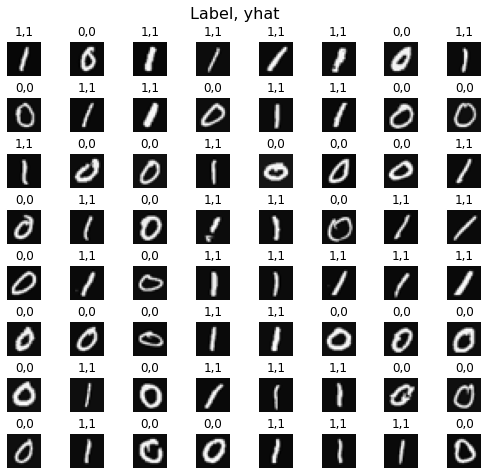

In [24]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(7,7))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

<a name="2.5"></a>
## 2.5 NumPy Model Implementation (Forward Prop in NumPy)
Just like we implemented the above using Tensorflow, it is also possible to do the same using Numpy. This section below does exactly that. 


Below, we build a dense layer subroutine. We utilize for loop to visit each unit (`j`) in the layer and perform the dot product of the weights for that unit (`W[:,j]`) and sum the bias for the unit (`b[j]`) to form `z`. An activation function `g(z)` is then applied to that result. 

In [27]:
def my_dense(a_in, W, b, g):
    units = W.shape[1]
    a_out = np.zeros(units)
    
    for j in range(units):
        w = W[:,j]
        z = np.dot(a_in, w) + b[j]
        a_out[j] = g(z)
        
    return a_out

In [28]:
# Quick Check
x_tst = 0.1*np.arange(1,3,1).reshape(2,)  # (1 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)  # (3 features)
A_tst = my_dense(x_tst, W_tst, b_tst, sigmoid)
print(A_tst)

[0.54735762 0.57932425 0.61063923]


The following cell builds a three-layer neural network utilizing the `my_dense` subroutine above.

In [30]:
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x, W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    a3 = my_dense(a2, W3, b3, sigmoid)
    return(a3)

We can copy trained weights and biases from Tensorflow.

In [31]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

In [32]:
# make predictions
prediction = my_sequential(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[0,0])
prediction = my_sequential(X[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[500,0])

yhat =  0  label=  0
yhat =  1  label=  1


Run the following cell to see predictions from both the Numpy model and the Tensorflow model. This takes a moment to run.

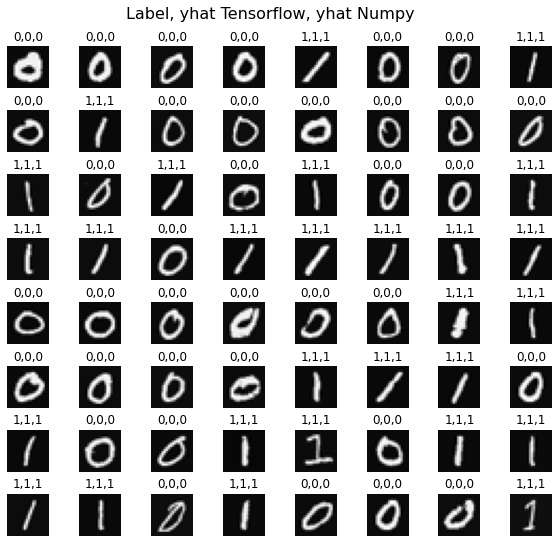

In [33]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random, cmap='gray')

    # Predict using the Neural Network implemented in Numpy
    my_prediction = my_sequential(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
    my_yhat = int(my_prediction >= 0.5)

    # Predict using the Neural Network implemented in Tensorflow
    tf_prediction = model.predict(X[random_index].reshape(1,400))
    tf_yhat = int(tf_prediction >= 0.5)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{tf_yhat},{my_yhat}")
    ax.set_axis_off() 
fig.suptitle("Label, yhat Tensorflow, yhat Numpy", fontsize=16)
plt.show()